# K - means (klasterovanje)

K - means tj. K -sredina, K je parametar koji odredjuje broj klastera
Lupimo k centroida (nesto kao predstavnici klastera)


In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('dogs.csv')
df.head()

,breed,height,weight
0,Border Collie,20,45
1,Boston Terrier,16,20
2,Brittany Spaniel,18,35
3,Bullmastiff,27,120
4,Chihuahua,8,8


In [4]:
feature_names = df.columns[1:]
feature_names

Index(['height', 'weight'], dtype='object')

In [7]:
X = df[feature_names]
X

,height,weight
0,20,45
1,16,20
2,18,35
3,27,120
4,8,8
5,25,78
6,23,70
7,32,160
8,21,50
9,19,65


In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()

In [11]:
X = pd.DataFrame(scaler.fit_transform(X), columns=feature_names)
X

,height,weight
0,0.538462,0.248366
1,0.384615,0.084967
2,0.461538,0.183007
3,0.807692,0.738562
4,0.076923,0.006536
5,0.730769,0.464052
6,0.653846,0.411765
7,1.000000,1.000000
8,0.576923,0.281046
9,0.500000,0.379085


In [12]:
from sklearn.cluster import KMeans

In [13]:
kmeans = KMeans(n_clusters=2)

In [14]:
kmeans.fit(X)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [15]:
kmeans.cluster_centers_

array([[0.43589744, 0.22875817],
       [0.90384615, 0.86928105]])

In [16]:
kmeans.inertia_

0.7828436301619692

In [17]:
kmeans.labels_

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int32)

In [18]:
import matplotlib.pyplot as plt

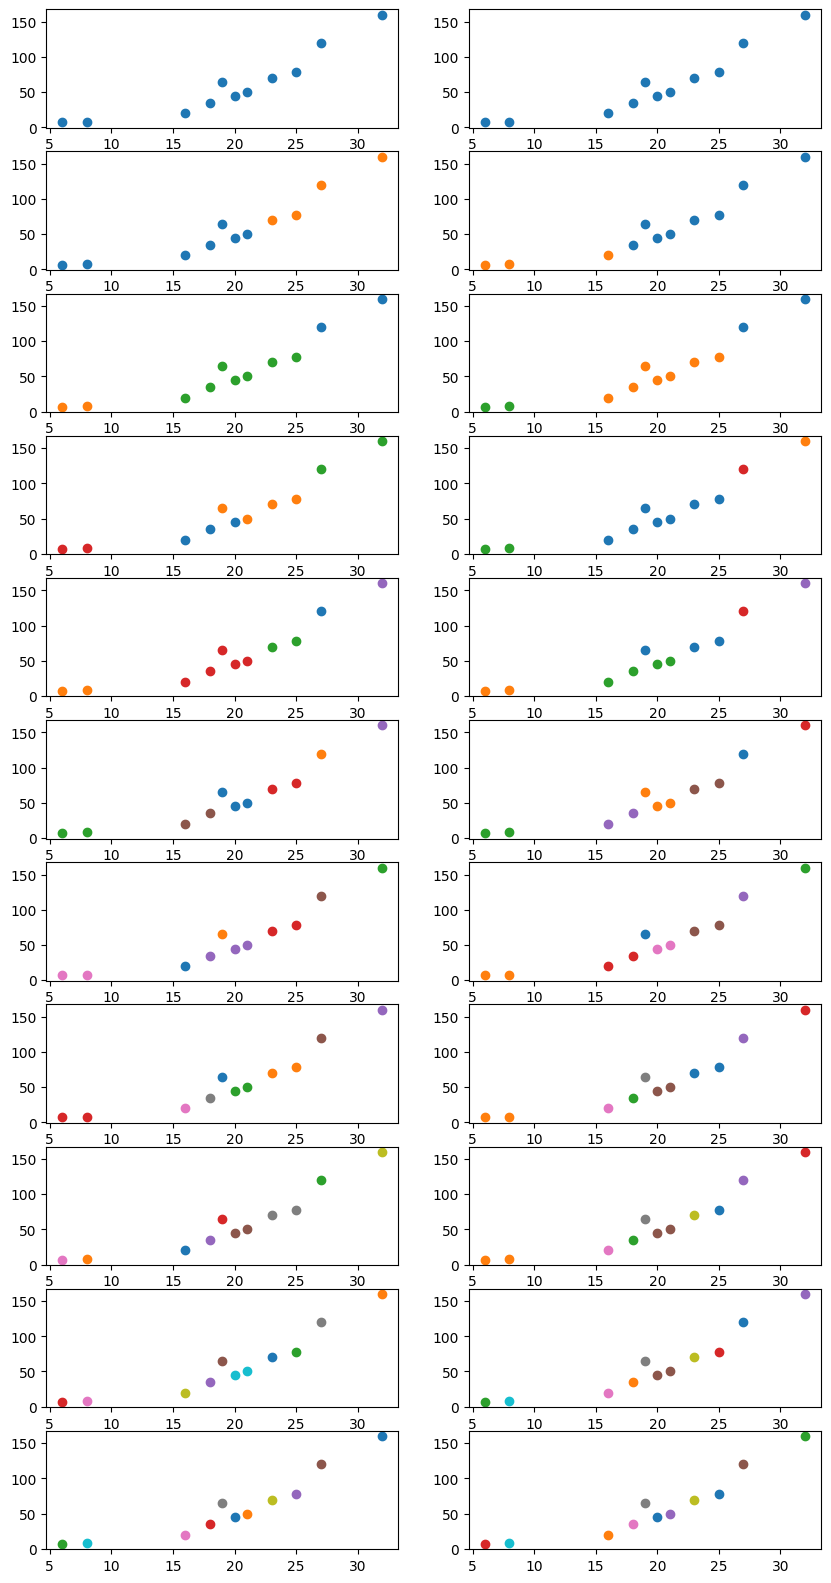

In [22]:
ks = range(1, X.shape[0] + 1)
inits = ['random', 'k-means++']
fig = plt.figure(figsize=(10,20))
idx = 1
for k in ks:
    for init in inits:
        kmeans = KMeans(n_clusters=k, init=init)
        kmeans.fit(X)

        fig.add_subplot(len(ks), len(inits), idx)
        idx += 1
        
        for cluster_label in range(k):
            cluster = df[kmeans.labels_ == cluster_label]
            plt.scatter(cluster['height'], cluster['weight'])